#### This script contains the following points:
1. Import libraries
2. Loading and checking data
3. Data cleaning. Manipulations and Reprocessing
4. The Elbow technique
5. Make an informed decision about number of clusters
6. Run the K-means algorithm
7. Attach cluster labels to the dataframe
8. Create visualizations of the clustered data
9. Discuss the clusters
10. Calculate descriptive statistics for clusters
11. How the K-means clustering results can be useful
12. Exporting the dataframe

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pylab as pl

In [3]:
# Creating a folder path
path = r'C:\Users\Lenovo\Desktop\Career Foundry\Achievement 6'

In [5]:
#Using the os.path.function to import the cleaned file
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Covid_clean_new2.csv'), index_col = False)

In [7]:
df.shape

(475065, 8)

In [9]:
# No one will understand scientific numbers. Changing the display setting:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [11]:
df.describe()

,Year,Month,COVID-19 Deaths,Number of Mentions
count,475065.00,475065.00,475065.00,475065.00
mean,2021.40,6.20,9.47,10.25
std,1.08,3.35,49.84,52.89
min,2020.00,1.00,0.00,0.00
25%,2020.00,3.00,0.00,0.00
50%,2021.00,6.00,0.00,0.00
75%,2022.00,9.00,6.00,6.00
max,2023.00,12.00,5094.00,5094.00


### 2. Data Cleaning, Manipulations and Reprocessing

In [14]:
# Drop non-numeric columns
df_cov_19_numeric = df.select_dtypes(include=[np.number])

In [16]:
# Check non-numeric columns are dropped
df_cov_19_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475065 entries, 0 to 475064
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                475065 non-null  float64
 1   Month               475065 non-null  float64
 2   COVID-19 Deaths     475065 non-null  float64
 3   Number of Mentions  475065 non-null  float64
dtypes: float64(4)
memory usage: 14.5 MB


In [18]:
# Select relevant features for clustering
features = df_cov_19_numeric[['COVID-19 Deaths', 'Number of Mentions']]

In [20]:
# Check selection
features.head(20)

,COVID-19 Deaths,Number of Mentions
0,0.00,0.00
1,0.00,0.00
2,0.00,0.00
3,0.00,0.00
4,0.00,0.00
5,0.00,0.00
6,0.00,0.00
7,0.00,0.00
8,7.00,9.00
9,0.00,0.00


In [22]:
# Standardize data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [24]:
# Check standardization
pd.DataFrame(scaled_features, columns = features.columns).head()

,COVID-19 Deaths,Number of Mentions
0,-0.19,-0.19
1,-0.19,-0.19
2,-0.19,-0.19
3,-0.19,-0.19
4,-0.19,-0.19


### 3. The Elbow Technique

In [27]:
# Using the elbow technique with the negative intertia (score) method
num_cl = range(1,10)
kmeans = [KMeans(n_clusters = i) for i in num_cl]
score = [kmeans[i].fit(scaled_features).score(scaled_features) for i in range(len(kmeans))]

score

[-950130.0000027618,
 -452419.3016225813,
 -254778.50103105255,
 -164750.9537393895,
 -117640.1041706795,
 -83961.14832434486,
 -65077.64062990562,
 -55681.76414701068,
 -42788.4289863725]

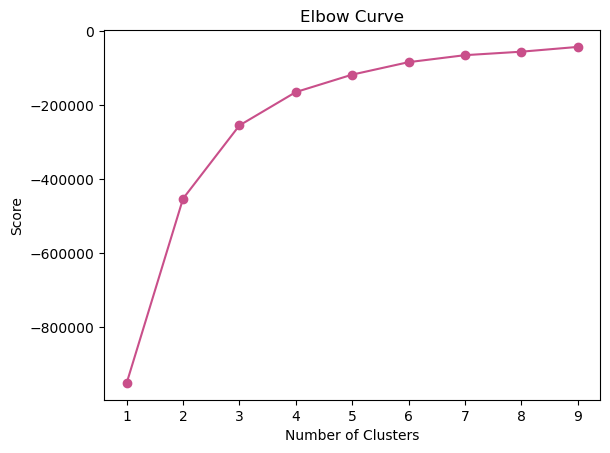

In [29]:
# Plot the elbow method graph with pylab
pl.plot(num_cl, score, marker = 'o', color = '#c94f8a')
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')

# Export the elbow method graph
file_name = os.path.join(path, '04 Analysis', 'Visualizations', 'elbow_method_pylab.png')
pl.savefig(file_name)
pl.show()

### 4. Make an Informed Decision

#### Based on the elbow plot, the optimal number of clusters appears to be 4 because the curve starts to flatten around 4 clusters.

### 5. K-Means Algorithm

In [36]:
# Apply the K-means algorithm to the standardized data with the chosen number of clusters, 4
optimal_clusters = 4
kmeans = KMeans(n_clusters = optimal_clusters, random_state = 18, n_init = 10)

### 6. Attaching the clusters to the dataframe

In [41]:
# Add the cluster labels to the original dataframe and to the subset
df['Cluster'] = kmeans.fit_predict(scaled_features)
df_cov_19_numeric['Cluster'] = kmeans.fit_predict(scaled_features)

In [43]:
# Check cluster assignment
df_cov_19_numeric.head(10)

,Year,Month,COVID-19 Deaths,Number of Mentions,Cluster
0,2020.00,1.00,0.00,0.00,0
1,2020.00,2.00,0.00,0.00,0
2,2020.00,3.00,0.00,0.00,0
3,2020.00,4.00,0.00,0.00,0
4,2020.00,5.00,0.00,0.00,0
5,2020.00,6.00,0.00,0.00,0
6,2020.00,7.00,0.00,0.00,0
7,2020.00,8.00,0.00,0.00,0
8,2020.00,9.00,7.00,9.00,0
9,2020.00,10.00,0.00,0.00,0


### 7. Scatterplot Using Clustered Data

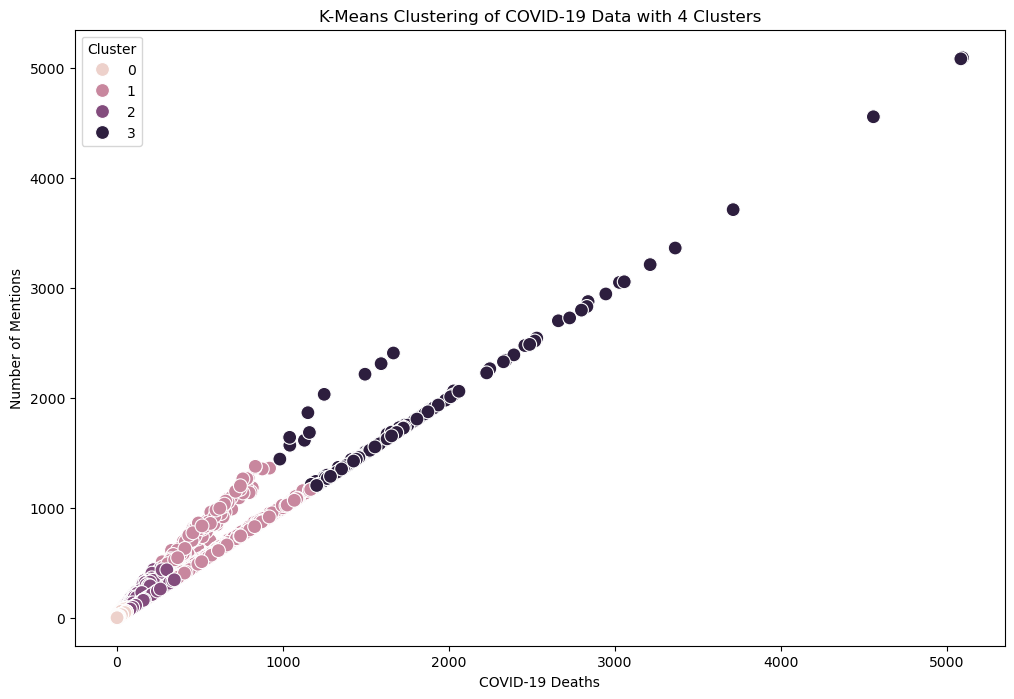

In [51]:
# Plotting the clusters of COVID-19 Deaths and Number of Mentions
plt.figure(figsize=(12,8))
sns.scatterplot(data = df_cov_19_numeric, x = 'COVID-19 Deaths', y = 'Number of Mentions', hue = 'Cluster', color = ['#892a58','#c94f8a','#e19dbe','#f3d8e5'], s = 100)
plt.title('K-Means Clustering of COVID-19 Data with 4 Clusters')
plt.xlabel('COVID-19 Deaths')
plt.ylabel('Number of Mentions')
plt.legend(title = 'Cluster')

# Export the scatterplot of clusters
file_name = os.path.join(path, '04 Analysis', 'Visualizations', 'kmeans_clustering.png')
plt.savefig(file_name)
plt.show()

#### Perform additional k-means clustering analyses focusing on the top 5 conditions identified in the previous exercises:l failure

1. Influenza and pneumonia

2. Vascular and unspecified dementia

3. Ischemic heart disease

4. Diabetes

5. Renal failure

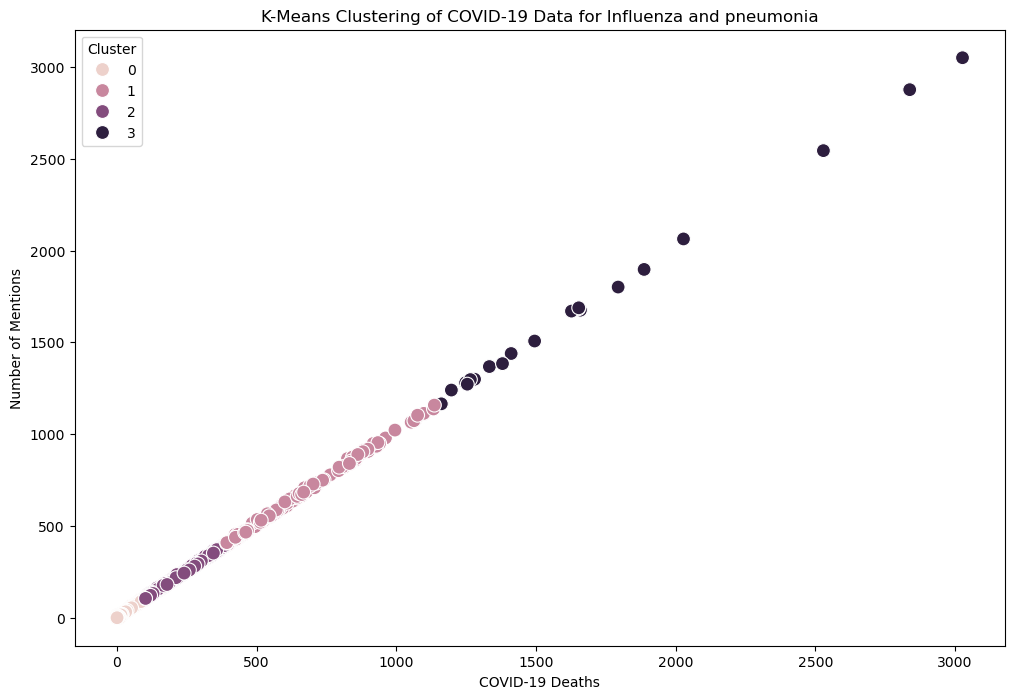

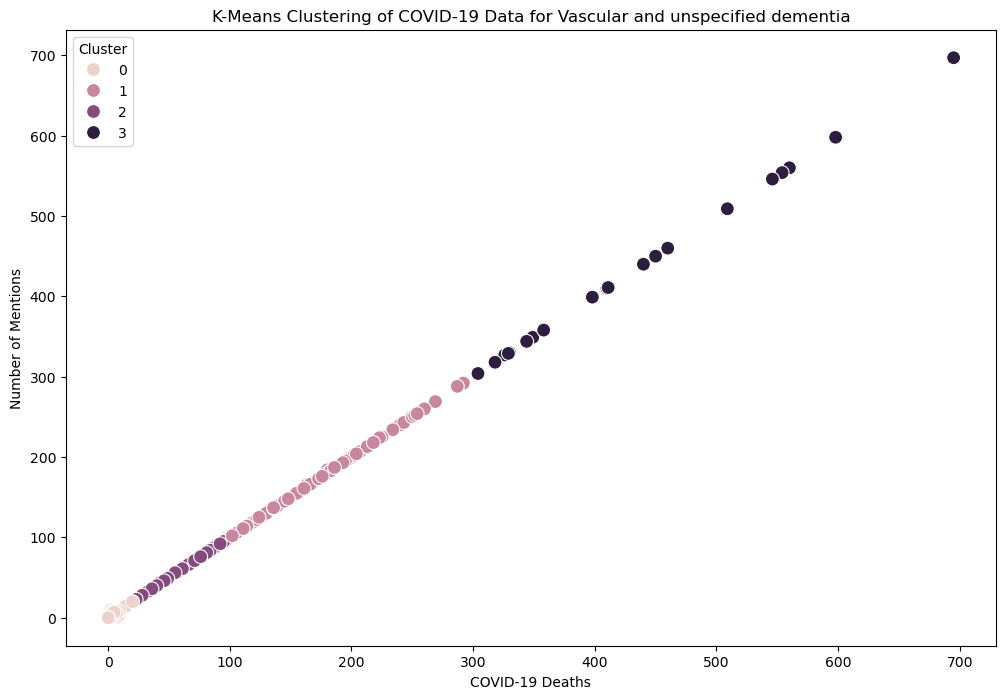

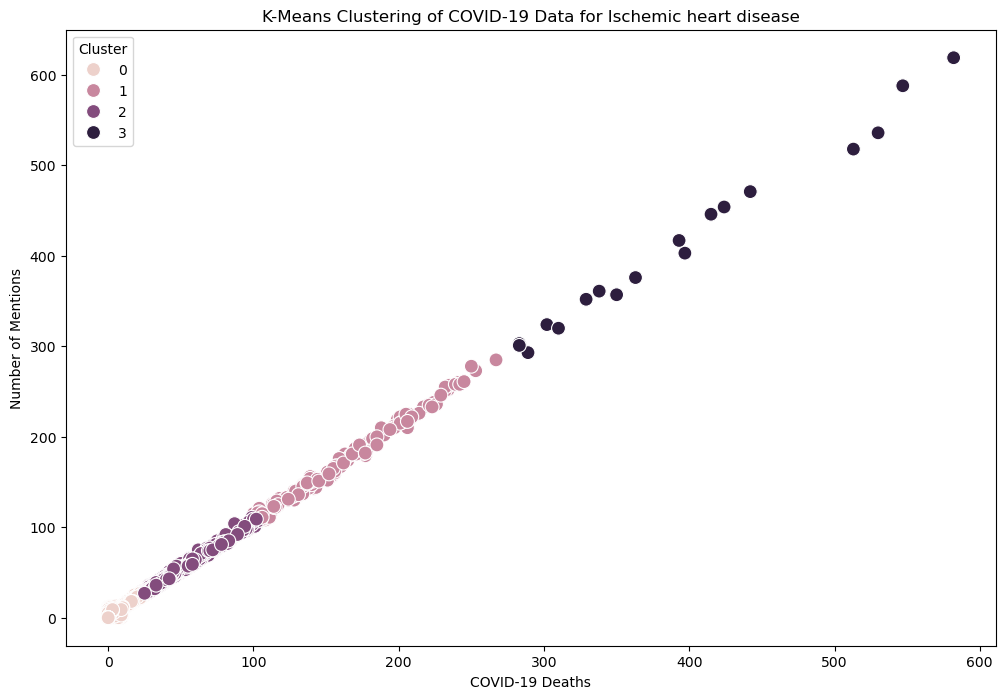

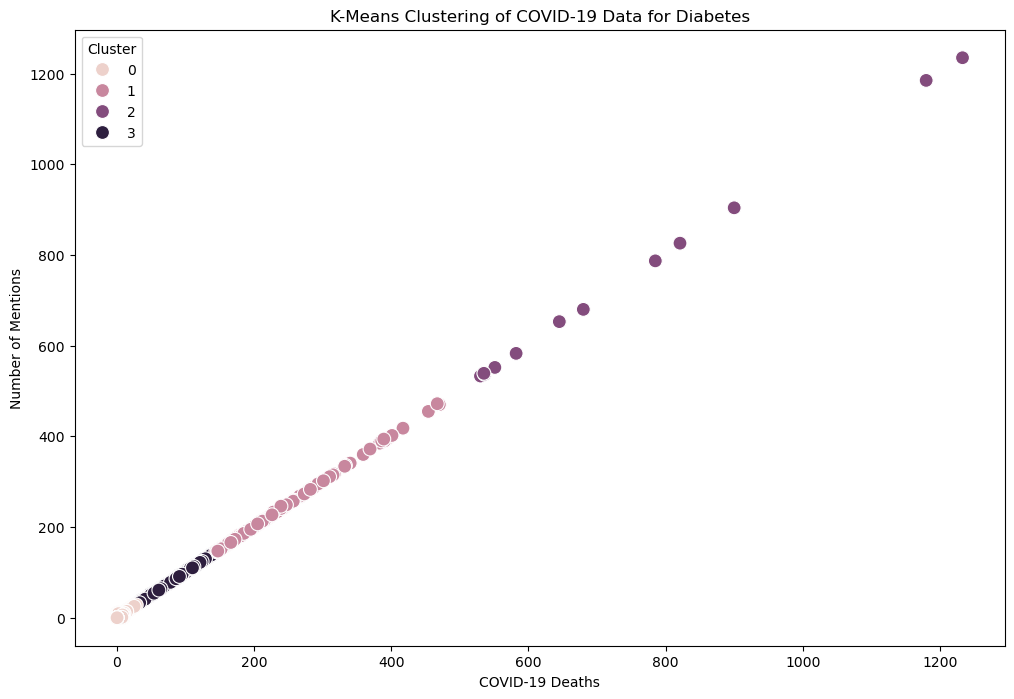

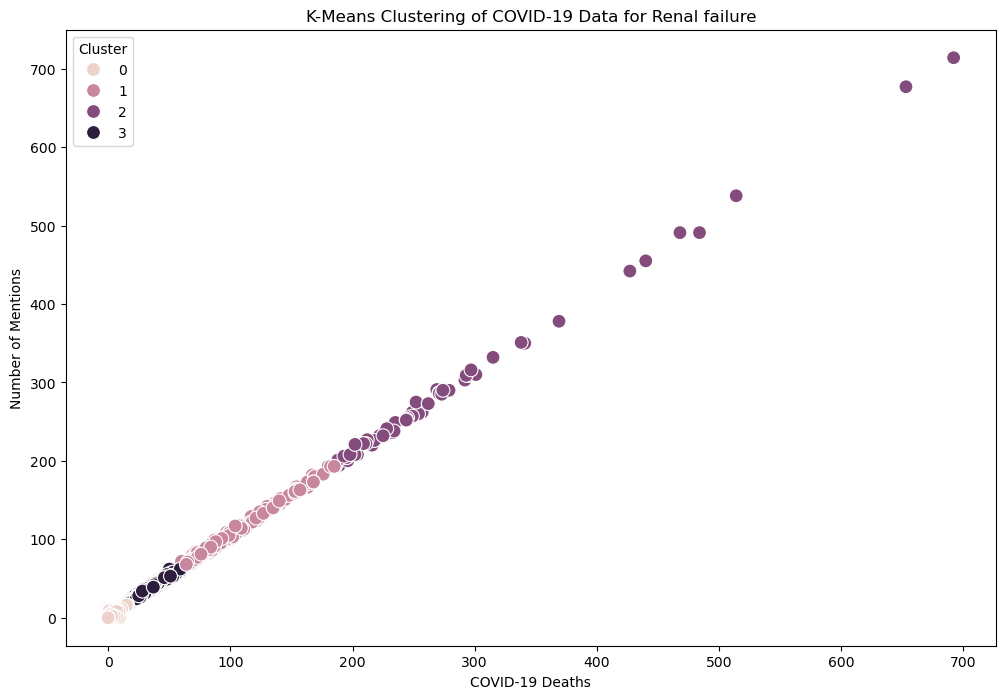

In [56]:
# Filter the dataset to include only the selected conditions
top_conditions = ['Influenza and pneumonia', 'Vascular and unspecified dementia', 'Ischemic heart disease', 'Diabetes', 'Renal failure']

# Loop through each condition, runniing the k-means clustering analysis and creating scatterplots
for condition in top_conditions:
    # Filter the dataset for the specific condition
    df_condition = df[df['Condition'] == condition].copy()
    
    # Select relevant features for clustering
    features_condition = df_condition[['COVID-19 Deaths', 'Number of Mentions']]
    
    # Standardize the data
    scaled_features_condition = scaler.fit_transform(features_condition)
             
    # Run K-Means algorithm using optimal clusters = 4
    kmeans_condition = KMeans(n_clusters=optimal_clusters, random_state=18, n_init=10)
    df_condition.loc[:, 'Cluster'] = kmeans_condition.fit_predict(scaled_features_condition)
        
    # Scatterplot for the specific condition
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data = df_condition, x = 'COVID-19 Deaths', y = 'Number of Mentions', hue = 'Cluster', color = ['#892a58','#c94f8a','#e19dbe','#f3d8e5'] , s = 100)
    plt.title(f'K-Means Clustering of COVID-19 Data for {condition}')
    plt.xlabel('COVID-19 Deaths')
    plt.ylabel('Number of Mentions')
    plt.legend(title='Cluster')
        
    # Export the scatter plot
    file_name = os.path.join(path, '04 Analysis', 'Visualizations', f'kmeans_clustering_{condition.replace(" ", "_").lower()}.png')
    plt.savefig(file_name)
    plt.show()

### 8. Discuss the Clusters

#### The clusters make sense ad they group data points with similar numbers of COVID-19 Deaths and Number of Mentions. Cluster 0 is the largest, indicating most data points have low numbera of deaths and mentions. Cluster 1 and 2 represent groups with increasing numbers of deaths and mentions, and cluster 3 is between clusters 0 and 1 indicating a moderate number of deaths and mentions.

#### The clusters can be interpreted meaningfully in the context of COVID-19 impact:

Cluster 0 represents minimal impact

Cluster 3 represents moderate impact

Cluster 1 represents high impact

Cluster 2 represents very high impact

### 9. Calculate Descriptive Statistics for Clusters

In [64]:
# Descriptive stats for clusters
cluster_stats = df_cov_19_numeric.groupby('Cluster').agg(['count', 'mean', 'std', 'min', 'max'])
cluster_stats

Year                                Month                       \
          count    mean  std     min     max   count mean  std  min   max   
Cluster                                                                     
0        463740 2021.41 1.09 2020.00 2023.00  463740 6.19 3.33 1.00 12.00   
1          1216 2020.78 0.73 2020.00 2023.00    1216 6.18 4.37 1.00 12.00   
2          9971 2020.94 0.81 2020.00 2023.00    9971 6.52 4.08 1.00 12.00   
3           138 2020.76 0.63 2020.00 2022.00     138 5.21 4.41 1.00 12.00   

        COVID-19 Deaths                               Number of Mentions  \
                  count    mean    std    min     max              count   
Cluster                                                                    
0                463740    4.63   9.98   0.00   77.00             463740   
1                  1216  561.34 193.71 272.00 1167.00               1216   
2                  9971  143.37  67.90  50.00  366.00               9971   
3                   138 1742.23 705.31 981.00 5094.00                138   

                                        
           mean    std     min     max  
Cluster                                 
0          4.98  10.94    0.00  107.00  
1        605.44 207.93  367.00 1377.00  
2        158.07  74.19   78.00  464.00  
3       1792.95 694.52 1181.00 5094.00

#### Interpretation of Descriptive Statistics:

Variability and Spread: The standard deviation values indicate that there is considerable variability within clusters, especially in Cluster 1 and 2, which have high variability in COVID-19 deaths and mentions.

Comaprisom Across Clusters: The mean values of COVID-19 deaths and mentions increase progressively from Cluster 0 to Cluster 2, highlighting the gradient of COVID-19 impact across different clusters.

### 10. How the K-means Clustering results can be useful

##### The K-means clustering analysis can be useful in multiple future steps in an analytics pipeline. For example, by using cluster labels as new features in feature engineering or by incorporating these labels into predictive modeling to improve the accuracy and context-awarness of the models. Additionally, creating visualizations and reports based on cluster differences can enhance the communication of insights and lead to better informed decision-making.

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475065 entries, 0 to 475064
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                475065 non-null  float64
 1   Month               475065 non-null  float64
 2   State               475065 non-null  object 
 3   Condition Group     475065 non-null  object 
 4   Condition           475065 non-null  object 
 5   Age Group           475065 non-null  object 
 6   COVID-19 Deaths     475065 non-null  float64
 7   Number of Mentions  475065 non-null  float64
 8   Cluster             475065 non-null  int32  
dtypes: float64(4), int32(1), object(4)
memory usage: 30.8+ MB


In [72]:
# Export the "df_cov_19" dataframe to CSV
df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'clustered_covid_data.csv'), index=False)